In [1155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [1013]:
df=pd.read_csv('Transport.csv')

In [1014]:
df

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport
...,...,...,...,...,...,...,...,...,...
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport


In [1015]:
#head of the data
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [1016]:
#tail of the data
df.tail()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
439,40,Male,1,0,20,57.0,21.4,1,Private Transport
440,38,Male,1,0,19,44.0,21.5,1,Private Transport
441,37,Male,1,0,19,45.0,21.5,1,Private Transport
442,37,Male,0,0,19,47.0,22.8,1,Private Transport
443,39,Male,1,1,21,50.0,23.4,1,Private Transport


# 1.1) Read the dataset. Do the descriptive statistics and do null value condition check.

# Checking the data info

In [1017]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


There are total of 9 variables:
float64(2)
int64(5)
object(2)

# Summary of the data

In [1018]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


# shape of the dataframe

In [1019]:
print('Number of rows:',df.shape[0],'\nNumber of columns:',df.shape[1])

Number of rows: 444 
Number of columns: 9


# unique counts

In [1020]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

GENDER :  2
Female    128
Male      316
Name: Gender, dtype: int64


TRANSPORT :  2
Private Transport    144
Public Transport     300
Name: Transport, dtype: int64




# Checking for missing value in any column

In [1021]:
df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

From the above, it is clear that there is no null values.

# Checking for duplicate data

In [1022]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport


From the above, it is clear that there is no duplicated values.

# 1.2 Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (5 pts). Interpret the inferences for each (3 pts)

# Univariate Analysis 

# Checking the spread of the data using countplot for the continuous variable.

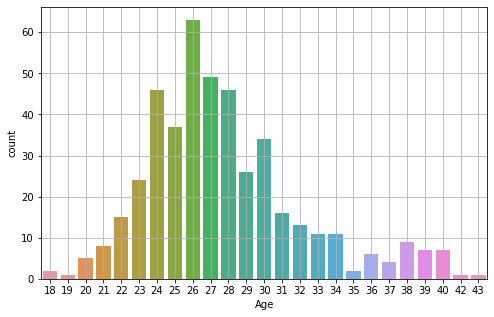

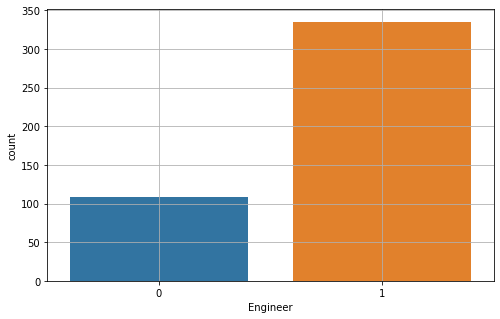

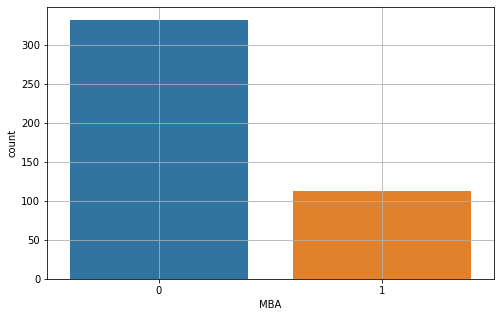

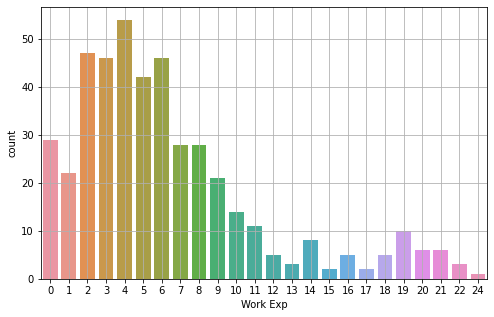

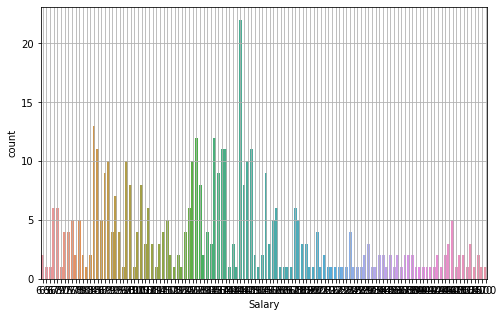

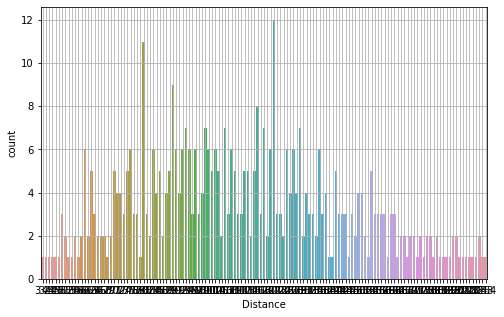

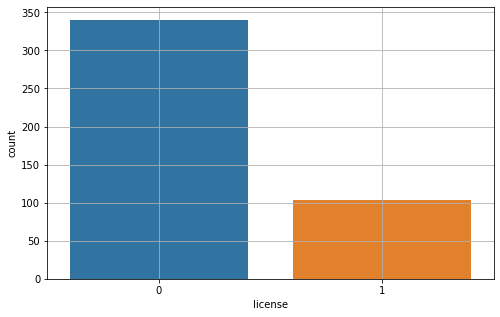

In [1023]:
cols = ['Age','Engineer','MBA','Work Exp','Salary','Distance','license']
for i in cols:
    plt.figure(figsize=(8,5))
    sns.countplot(df1[i])
    plt.grid()
    plt.show();

# Checking the spread of the data using countplot for the categorical variables.

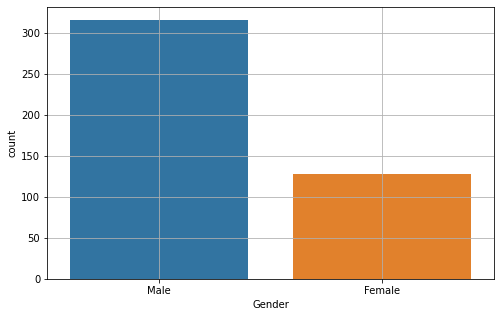

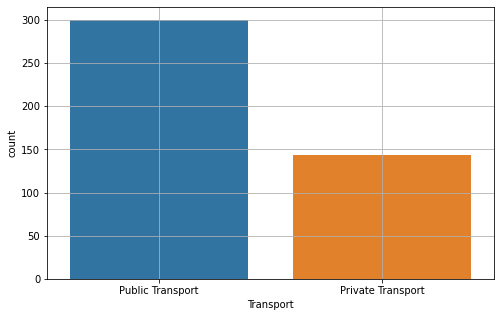

In [1024]:
cols = ['Gender','Transport']
for i in cols:
    plt.figure(figsize=(8,5))
    sns.countplot(df[i])
    plt.grid()
    plt.show();

# Bivariate Analysis

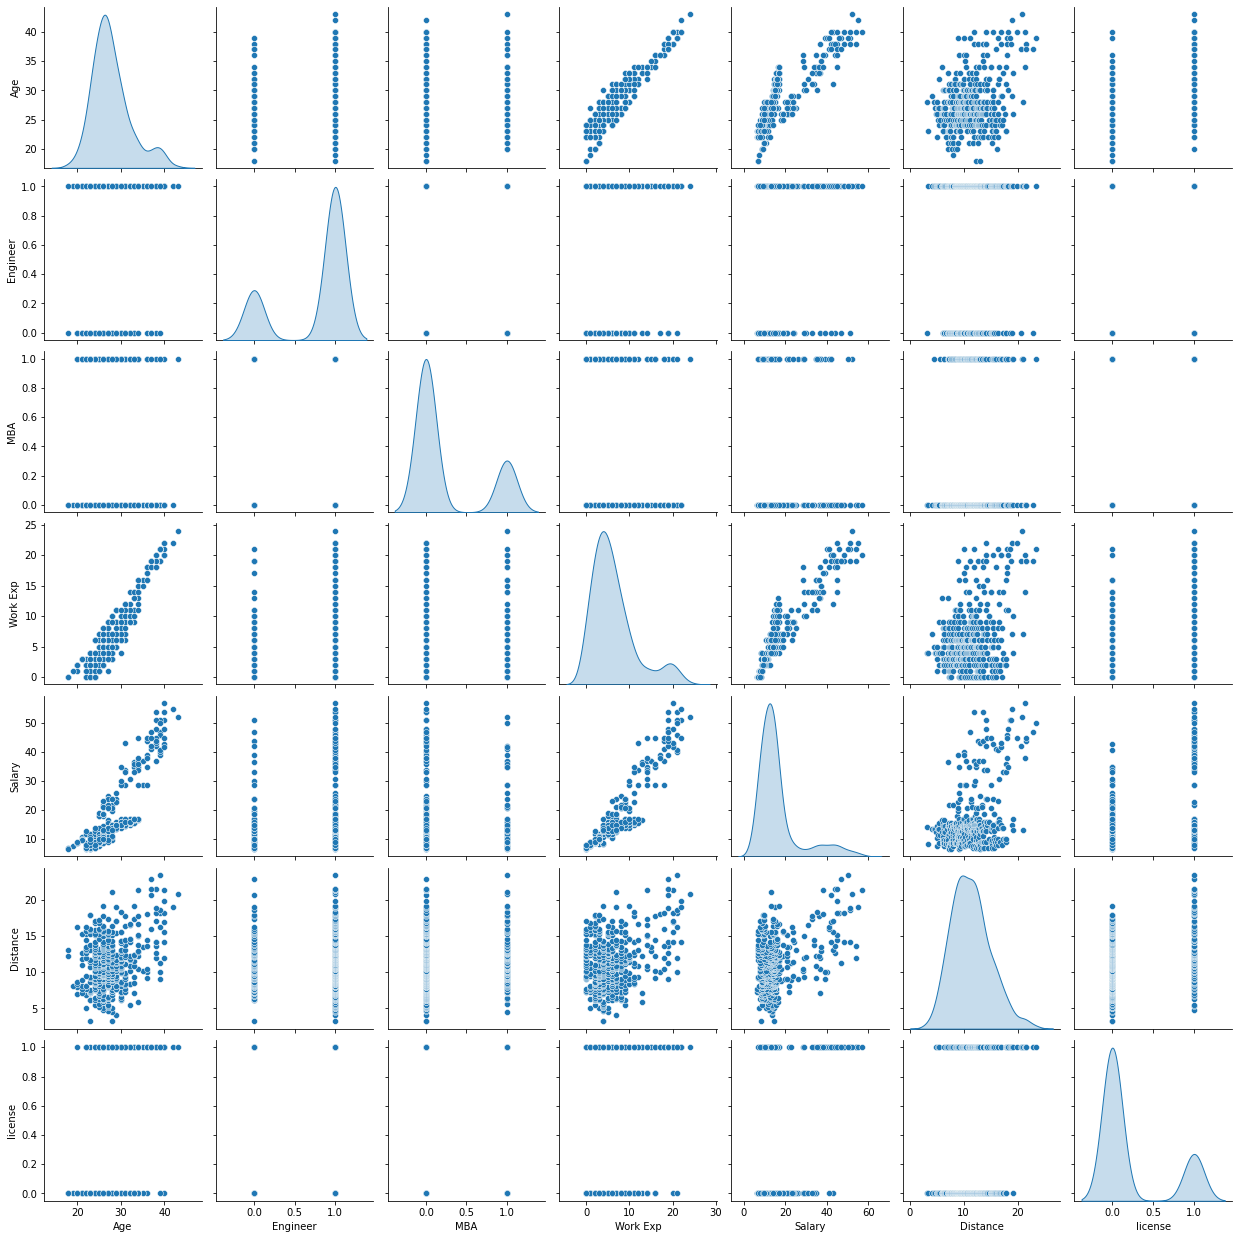

In [1025]:
df1 = (df[cont_cols])
sns.pairplot(df1, diag_kind='kde')  
plt.show()

# Checking for Correlation

In [1026]:
df.corr()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311
Engineer,0.091935,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924
MBA,-0.029090,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358
Work Exp,0.932236,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867
Salary,0.860673,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095
Distance,0.352872,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084
license,0.452311,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000


# Checking on Heat map

<AxesSubplot:>

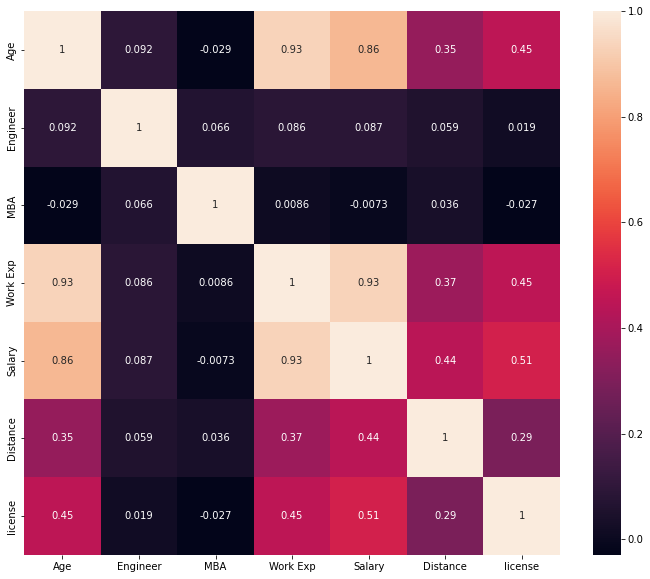

In [1027]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

# Checking for Outliers

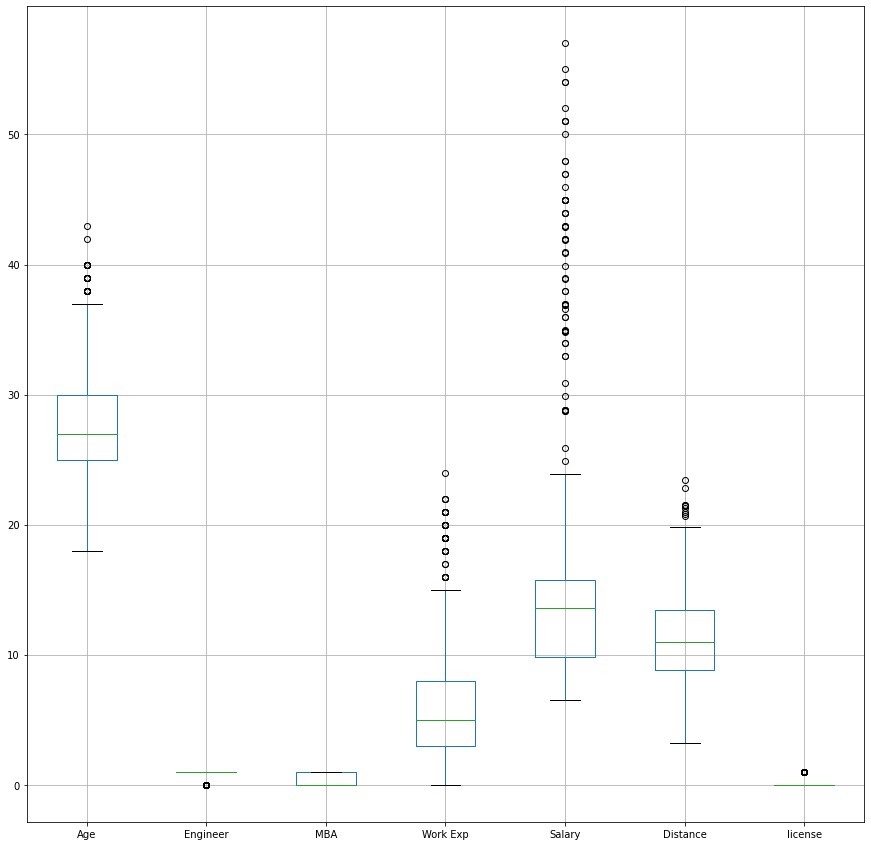

In [1028]:
plt.figure(figsize=(15,15))
df[['Age','Engineer','MBA','Work Exp','Salary','Distance','license']].boxplot(vert=1)
plt.show()

# percentage of outliers present in the dataset

In [1029]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()/df.shape[0]*100).round(2),columns=['Outliers %'])

,Outliers %
Age,5.63
Distance,2.03
Engineer,24.55
Gender,0.00
MBA,0.00
Salary,13.29
Transport,0.00
Work Exp,8.56
license,23.42


# Treating the outliers.

In [1030]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1031]:
lr,ur=remove_outlier(df['Age'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Age']=np.where(df['Age']>ur,ur,df['Age'])
df['Age']=np.where(df['Age']<lr,lr,df['Age'])
print('')

lr,ur=remove_outlier(df['Engineer'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Engineer']=np.where(df['Engineer']>ur,ur,df['Engineer'])
df['Engineer']=np.where(df['Engineer']<lr,lr,df['Engineer'])
print('')

lr,ur=remove_outlier(df['MBA'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['MBA']=np.where(df['MBA']>ur,ur,df['MBA'])
df['MBA']=np.where(df['MBA']<lr,lr,df['MBA'])
print('')

lr,ur=remove_outlier(df['Work Exp'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Work Exp']=np.where(df['Work Exp']>ur,ur,df['Work Exp'])
df['Work Exp']=np.where(df['Work Exp']<lr,lr,df['Work Exp'])
print('')

lr,ur=remove_outlier(df['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Salary']=np.where(df['Salary']>ur,ur,df['Salary'])
df['Salary']=np.where(df['Salary']<lr,lr,df['Salary'])
print('')

lr,ur=remove_outlier(df['Distance'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['Distance']=np.where(df['Distance']>ur,ur,df['Distance'])
df['Distance']=np.where(df['Distance']<lr,lr,df['Distance'])
print('')

lr,ur=remove_outlier(df['license'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['license']=np.where(df['license']>ur,ur,df['license'])
df['license']=np.where(df['license']<lr,lr,df['license'])
print('')

Lower Range : 17.5 
Upper Range : 37.5

Lower Range : 1.0 
Upper Range : 1.0

Lower Range : -1.5 
Upper Range : 2.5

Lower Range : -4.5 
Upper Range : 15.5

Lower Range : 0.9125000000000014 
Upper Range : 24.612499999999997

Lower Range : 1.8625000000000007 
Upper Range : 20.3625

Lower Range : 0.0 
Upper Range : 0.0



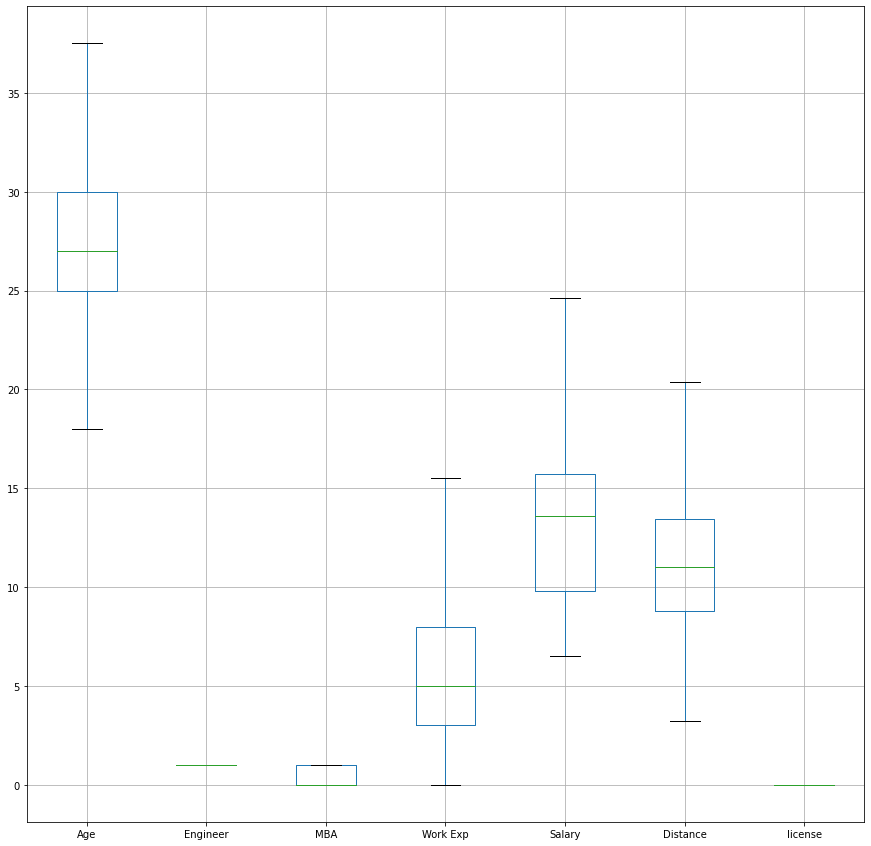

In [1032]:
plt.figure(figsize=(15,15))
df[['Age','Engineer','MBA','Work Exp','Salary','Distance','license']].boxplot(vert=1)
plt.show()

#### Skew

In [1033]:
df.skew(axis = 0, skipna = True)

Age         0.710979
Engineer    0.000000
MBA         1.144763
Work Exp    0.843610
Salary      0.800178
Distance    0.423135
license     0.000000
dtype: float64

# 1.3) Encode the data (having string values) for Modelling(2 pts). Is Scaling necessary here or not?(2 pts), Data Split: Split the data into train and test (70:30) (2 pts).

In [1034]:
round(df.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.652,4.168,18.0,25.0,27.0,30.000,37.500
Engineer,444.0,1.000,0.000,1.0,1.0,1.0,1.000,1.000
MBA,444.0,0.252,0.435,0.0,0.0,0.0,1.000,1.000
Work Exp,444.0,5.982,4.322,0.0,3.0,5.0,8.000,15.500
Salary,444.0,14.140,5.323,6.5,9.8,13.6,15.725,24.612
Distance,444.0,11.298,3.536,3.2,8.8,11.0,13.425,20.362
license,444.0,0.000,0.000,0.0,0.0,0.0,0.000,0.000


In [1035]:
df.dtypes

Age          float64
Gender        object
Engineer     float64
MBA          float64
Work Exp     float64
Salary       float64
Distance     float64
license      float64
Transport     object
dtype: object

# Convert all objects to categorical codes

In [1036]:
gen=[]
for x in df['Gender']:
    if x=="Male":
        gen.append(1)
    else:
        gen.append(0)
df['Gender']=gen
df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,1,1.0,0.0,4.0,14.3,3.2,0.0,Public Transport
1,23.0,0,1.0,0.0,4.0,8.3,3.3,0.0,Public Transport
2,29.0,1,1.0,0.0,7.0,13.4,4.1,0.0,Public Transport
3,28.0,0,1.0,1.0,5.0,13.4,4.5,0.0,Public Transport
4,27.0,1,1.0,0.0,4.0,13.4,4.6,0.0,Public Transport
5,26.0,1,1.0,0.0,4.0,12.3,4.8,0.0,Public Transport
6,28.0,1,1.0,0.0,5.0,14.4,5.1,0.0,Private Transport
7,26.0,0,1.0,0.0,3.0,10.5,5.1,0.0,Public Transport
8,22.0,1,1.0,0.0,1.0,7.5,5.1,0.0,Public Transport
9,27.0,1,1.0,0.0,4.0,13.5,5.2,0.0,Public Transport


In [1037]:
tran=[]
for x in df['Transport']:
    if x=="Public Transport":
        tran.append(1)
    else:
        tran.append(0)
df['Transport']=tran
df.head(10)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28.0,1,1.0,0.0,4.0,14.3,3.2,0.0,1
1,23.0,0,1.0,0.0,4.0,8.3,3.3,0.0,1
2,29.0,1,1.0,0.0,7.0,13.4,4.1,0.0,1
3,28.0,0,1.0,1.0,5.0,13.4,4.5,0.0,1
4,27.0,1,1.0,0.0,4.0,13.4,4.6,0.0,1
5,26.0,1,1.0,0.0,4.0,12.3,4.8,0.0,1
6,28.0,1,1.0,0.0,5.0,14.4,5.1,0.0,0
7,26.0,0,1.0,0.0,3.0,10.5,5.1,0.0,1
8,22.0,1,1.0,0.0,1.0,7.5,5.1,0.0,1
9,27.0,1,1.0,0.0,4.0,13.5,5.2,0.0,1


In [1038]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    float64
 1   Gender     444 non-null    int64  
 2   Engineer   444 non-null    float64
 3   MBA        444 non-null    float64
 4   Work Exp   444 non-null    float64
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    float64
 8   Transport  444 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 31.3 KB


# Proportion of 1s and 0s

In [1039]:
df.Transport.value_counts(normalize=True)

1    0.675676
0    0.324324
Name: Transport, dtype: float64

In [1040]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [1041]:
x

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,28.0,1,1.0,0.0,4.0,14.3000,3.2000,0.0
1,23.0,0,1.0,0.0,4.0,8.3000,3.3000,0.0
2,29.0,1,1.0,0.0,7.0,13.4000,4.1000,0.0
3,28.0,0,1.0,1.0,5.0,13.4000,4.5000,0.0
4,27.0,1,1.0,0.0,4.0,13.4000,4.6000,0.0
...,...,...,...,...,...,...,...,...
439,37.5,1,1.0,0.0,15.5,24.6125,20.3625,0.0
440,37.5,1,1.0,0.0,15.5,24.6125,20.3625,0.0
441,37.0,1,1.0,0.0,15.5,24.6125,20.3625,0.0
442,37.0,1,1.0,0.0,15.5,24.6125,20.3625,0.0


In [1042]:
y

0      1
1      1
2      1
3      1
4      1
      ..
439    0
440    0
441    0
442    0
443    0
Name: Transport, Length: 444, dtype: int64

# Split data into training and test set

In [1043]:
# Split X and Y into 70 :30 ratio

, x_test,y_train, y_test= train_test_split(x,y,test_size =.30,random_state = 42)

('x_test,y_train,',
 'y_test=',
 'train_test_split(x,y,test_size',
 '=.30,random_state',
 '=',
 '42)')

# Check the dimensions of the training and test data

In [1044]:
print('x_train',X_train.shape)
print('x_test',X_test.shape)
print('y_train',Y_train.shape)
print('y_test',Y_test.shape)

x_train (310, 8)
x_test (134, 8)
y_train (310,)
y_test (134,)


# Scaling
We need to do scaling before using distance based models. Standard Scaling , or Min-Max scaling either one of these can used.

In [1051]:
X_train.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
201,29.0,1,1.0,0.0,5.0,15.9,10.5,0.0
386,27.0,1,1.0,1.0,6.0,12.9,15.6,0.0
329,27.0,1,1.0,0.0,6.0,12.9,13.3,0.0
249,23.0,1,1.0,0.0,0.0,6.9,11.7,0.0
349,30.0,1,1.0,0.0,7.0,14.9,14.0,0.0


In [1052]:
sc=StandardScaler()

In [1053]:
X_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

In [1167]:
X_train_sc.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,0.331618,0.659686,0.0,-0.594737,-0.218276,0.337996,-0.213637,0.0
1,-0.152154,0.659686,0.0,1.681416,0.013853,-0.223344,1.213093,0.0
2,-0.152154,0.659686,0.0,-0.594737,0.013853,-0.223344,0.569666,0.0
3,-1.119699,0.659686,0.0,-0.594737,-1.378917,-1.346022,0.122064,0.0
4,0.573504,0.659686,0.0,-0.594737,0.245981,0.150883,0.765491,0.0


In [1168]:
X_test_sc.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,-0.394040,-1.515873,0.0,-0.594737,0.478109,0.094749,0.094089,0.0
1,-0.152154,0.659686,0.0,1.681416,-0.218276,-0.036231,-0.353513,0.0
2,1.782935,-1.515873,0.0,-0.594737,2.219072,1.968218,-0.297563,0.0
3,-0.877813,0.659686,0.0,1.681416,-0.914661,-1.027930,-1.360616,0.0
4,1.299163,0.659686,0.0,-0.594737,1.174494,0.487686,-0.101737,0.0


# 1.4) Apply Logistic Regression(4 pts). Interpret the inferences of both model s (2 pts)


In [1054]:
classifier=LogisticRegression()

In [1055]:
LR = LogisticRegression(solver='newton-cg',penalty='none')

In [1056]:
parameter = {'penalty':['l1','l2','elastricnet'],'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50],'max_iter':[100,200,300]}

In [1057]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [1058]:
classifier_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elastricnet']},
             scoring='accuracy')

In [1059]:
print(classifier_regressor.best_params_)

{'C': 3, 'max_iter': 100, 'penalty': 'l2'}


# Model 1 - Building the model on the Training Data without scaled data. 

In [1070]:
Logistic_1 = LR.fit(Train[['Age','Gender','Engineer','MBA','Work Exp','Salary','Distance','license']],Train['Transport'])

In [1071]:
print('Accuracy Score of Model 1:',Logistic_1.score(Train[['Age','Gender','Engineer','MBA','Work Exp','Salary','Distance','license']],Train['Transport']))

Accuracy Score of Model 1: 0.7774193548387097


# Predicting the classes and the probabilities on the Training Data

In [1072]:
model_1_test_class = Logistic_1.predict(Test[['Age','Gender','Engineer','MBA','Work Exp','Salary','Distance','license']])
model_1_test_probabilities = Logistic_1.predict_proba(Test[['Age','Gender','Engineer','MBA','Work Exp','Salary','Distance','license']])

In [1073]:
model_1_test_class

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [1170]:
model_1_test_probabilities

array([[0.08291952, 0.91708048],
       [0.04772561, 0.95227439],
       [0.19767572, 0.80232428],
       [0.92591029, 0.07408971],
       [0.68979078, 0.31020922],
       [0.06318548, 0.93681452],
       [0.05472353, 0.94527647],
       [0.13321776, 0.86678224],
       [0.20643879, 0.79356121],
       [0.03267822, 0.96732178],
       [0.75991359, 0.24008641],
       [0.45420452, 0.54579548],
       [0.41520514, 0.58479486],
       [0.32897895, 0.67102105],
       [0.11618542, 0.88381458],
       [0.26996844, 0.73003156],
       [0.21832318, 0.78167682],
       [0.31027289, 0.68972711],
       [0.50625648, 0.49374352],
       [0.62872346, 0.37127654],
       [0.04475213, 0.95524787],
       [0.04140514, 0.95859486],
       [0.07937808, 0.92062192],
       [0.18337108, 0.81662892],
       [0.22361586, 0.77638414],
       [0.11577293, 0.88422707],
       [0.07222696, 0.92777304],
       [0.25314293, 0.74685707],
       [0.91029574, 0.08970426],
       [0.4285373 , 0.5714627 ],
       [0.

# Model 2 -  Building the model on the Training Data with scaled data.

In [1075]:
Logistic_2 = LR.fit(X_train_sc[['Age','Gender','Engineer','MBA','Work Exp','Salary','Distance','license']],Train['Transport'])

In [1076]:
print('Accuracy Score of Model 2:',Logistic_2.score(X_train_sc[['Age','Gender','Engineer','MBA','Work Exp','Salary','Distance','license']],Train['Transport']))

Accuracy Score of Model 2: 0.6741935483870968


# Predicting the classes and the probabilities on the Test Data

In [1077]:
model_2_Test_class = Logistic_2.predict(Test[['Age','Gender','Engineer','MBA','Work Exp','Salary','Distance','license']])
model_2_Test_probabilities = Logistic_2.predict_proba(Test[['Age','Gender','Engineer','MBA','Work Exp','Salary','Distance','license']])

In [1078]:
model_2_Test_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [1079]:
model_2_Test_probabilities

array([[0.04370427, 0.95629573],
       [0.1132241 , 0.8867759 ],
       [0.15171023, 0.84828977],
       [0.27552151, 0.72447849],
       [0.10467495, 0.89532505],
       [0.05606401, 0.94393599],
       [0.05011345, 0.94988655],
       [0.083622  , 0.916378  ],
       [0.12780794, 0.87219206],
       [0.04018031, 0.95981969],
       [0.06900672, 0.93099328],
       [0.23606555, 0.76393445],
       [0.06717824, 0.93282176],
       [0.10268806, 0.89731194],
       [0.08896491, 0.91103509],
       [0.13713097, 0.86286903],
       [0.16861798, 0.83138202],
       [0.08639432, 0.91360568],
       [0.09683138, 0.90316862],
       [0.37204667, 0.62795333],
       [0.05917113, 0.94082887],
       [0.02602898, 0.97397102],
       [0.08580666, 0.91419334],
       [0.10602066, 0.89397934],
       [0.07016318, 0.92983682],
       [0.03184409, 0.96815591],
       [0.09873435, 0.90126565],
       [0.09276673, 0.90723327],
       [0.28417116, 0.71582884],
       [0.2399577 , 0.7600423 ],
       [0.

# 1.5) Apply KNN Model(4 pts). Interpret the inferences of each model (2 pts)

# Model 1

In [1112]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [1113]:
x_train_predict = knn.predict(X_train)
x_test_predict = knn.predict(X_test)

In [1114]:
 print("Train Accuracy is : {}".format(accuracy_score(y_train,x_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,x_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,knn.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,x_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,x_test_predict))

Train Accuracy is : 0.5741935483870968

Test Accuracy is : 0.5522388059701493

Train ROC-AUC score is : 0.4534657320872274

Test ROC-AUC score is : 0.44137596899224807

Confusion matrix for train set :  
 [[ 18  78]
 [ 54 160]]

Confusion matrix for test set :  
 [[ 9 39]
 [21 65]]


In [1120]:
print('Classification report Train set :')
print(classification_report(y_train,x_train_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.25      0.19      0.21        96
           1       0.67      0.75      0.71       214

    accuracy                           0.57       310
   macro avg       0.46      0.47      0.46       310
weighted avg       0.54      0.57      0.56       310



In [1121]:
print('Classification report Test set :')
print(classification_report(y_test,x_test_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.30      0.19      0.23        48
           1       0.62      0.76      0.68        86

    accuracy                           0.55       134
   macro avg       0.46      0.47      0.46       134
weighted avg       0.51      0.55      0.52       134



# Model 2

In [1115]:
knn=KNeighborsClassifier()
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [1116]:
Y_train_predict = knn.predict(X_train_sc)
Y_test_predict = knn.predict(X_test_sc)

In [1117]:
print("Train Accuracy is : {}".format(accuracy_score(y_train,Y_train_predict)))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,Y_test_predict)))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,knn.predict_proba(X_train_sc)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,knn.predict_proba(X_test_sc)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,Y_train_predict))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,Y_test_predict))

Train Accuracy is : 0.7612903225806451

Test Accuracy is : 0.5970149253731343

Train ROC-AUC score is : 0.7773559190031153

Test ROC-AUC score is : 0.4574854651162791

Confusion matrix for train set :  
 [[ 45  51]
 [ 23 191]]

Confusion matrix for test set :  
 [[ 8 40]
 [14 72]]


In [1118]:
print('Classification report Train set :')
print(classification_report(y_train,Y_train_predict))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.66      0.47      0.55        96
           1       0.79      0.89      0.84       214

    accuracy                           0.76       310
   macro avg       0.73      0.68      0.69       310
weighted avg       0.75      0.76      0.75       310



In [1119]:
print('Classification report Test set :')
print(classification_report(y_test,Y_test_predict))

Classification report Test set :
              precision    recall  f1-score   support

           0       0.36      0.17      0.23        48
           1       0.64      0.84      0.73        86

    accuracy                           0.60       134
   macro avg       0.50      0.50      0.48       134
weighted avg       0.54      0.60      0.55       134



# 1.6) Bagging ( 4 pts) and Boosting (4 pts), Model Tuning (4 pts).

# Bagging 

# Model 1

In [1142]:
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [1143]:
## Performance Matrix on train data set
x_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, x_train_predict))
print(metrics.classification_report(y_train, x_train_predict))

0.9967741935483871
[[ 95   1]
 [  0 214]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       1.00      1.00      1.00       214

    accuracy                           1.00       310
   macro avg       1.00      0.99      1.00       310
weighted avg       1.00      1.00      1.00       310



In [1144]:
## Performance Matrix on test data set
x_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, x_test_predict))
print(metrics.classification_report(y_test, x_test_predict))

0.5373134328358209
[[ 7 41]
 [21 65]]
              precision    recall  f1-score   support

           0       0.25      0.15      0.18        48
           1       0.61      0.76      0.68        86

    accuracy                           0.54       134
   macro avg       0.43      0.45      0.43       134
weighted avg       0.48      0.54      0.50       134



# Model 2

In [1145]:
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_sc, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [1146]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train_sc)
model_score =Bagging_model.score(X_train_sc, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9967741935483871
[[ 95   1]
 [  0 214]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       1.00      1.00      1.00       214

    accuracy                           1.00       310
   macro avg       1.00      0.99      1.00       310
weighted avg       1.00      1.00      1.00       310



In [1147]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test_sc)
model_score = Bagging_model.score(X_test_sc, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.5447761194029851
[[ 7 41]
 [20 66]]
              precision    recall  f1-score   support

           0       0.26      0.15      0.19        48
           1       0.62      0.77      0.68        86

    accuracy                           0.54       134
   macro avg       0.44      0.46      0.44       134
weighted avg       0.49      0.54      0.51       134



# Boosting 

# Model 1

In [1148]:
ADB_model1 = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model1.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [1149]:
x_train_predict=ADB_model1.predict(x_train)
ADB_model_score=ADB_model1.score(x_train,y_train)
print('Model Score with ADA Boosting algoritms is',ADB_model_score)

Model Score with ADA Boosting algoritms is 0.8838709677419355


In [1150]:
print(metrics.confusion_matrix(y_train, x_train_predict))
print(metrics.classification_report(y_train, x_train_predict))

[[ 66  30]
 [  6 208]]
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        96
           1       0.87      0.97      0.92       214

    accuracy                           0.88       310
   macro avg       0.90      0.83      0.85       310
weighted avg       0.89      0.88      0.88       310



# Model 2

In [1151]:
ADB_model2 = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model2.fit(X_train_sc,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [1152]:
x_train_predict=ADB_model2.predict(X_train_sc)
ADB_model_score=ADB_model2.score(X_train_sc,y_train)
print('Model Score with ADA Boosting algoritms is',ADB_model_score)

Model Score with ADA Boosting algoritms is 0.7580645161290323


In [1153]:
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

[[ 95   1]
 [  0 214]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       1.00      1.00      1.00       214

    accuracy                           1.00       310
   macro avg       1.00      0.99      1.00       310
weighted avg       1.00      1.00      1.00       310



# Model Tuning

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model (5 pts) Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized (3 pts)

# Confusion Matrix

In [1156]:
rcParams['figure.figsize'] = 15,4

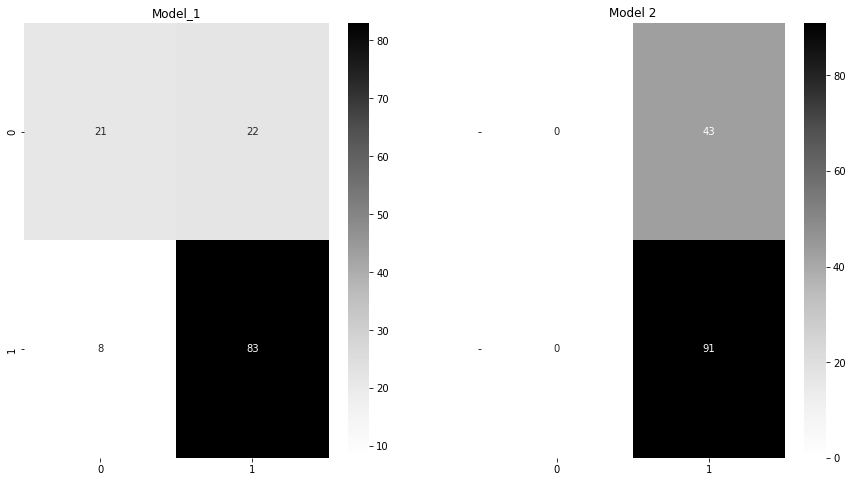

In [1171]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the test Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Transport'],model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Transport'],model_2_Test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2');

In [1161]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Transport'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Transport'],model_2_Test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')


Model 1
True Negative: 21 
False Positives: 22 
False Negatives: 8 
True Positives: 83 


Model 2
True Negative: 0 
False Positives: 43 
False Negatives: 0 
True Positives: 91 




In [1162]:
print('Model 1')
print(metrics.classification_report(Test['Transport'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['Transport'],model_2_Test_class),'\n')


Model 1
              precision    recall  f1-score   support

           0       0.72      0.49      0.58        43
           1       0.79      0.91      0.85        91

    accuracy                           0.78       134
   macro avg       0.76      0.70      0.72       134
weighted avg       0.77      0.78      0.76       134
 

Model 2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.68      1.00      0.81        91

    accuracy                           0.68       134
   macro avg       0.34      0.50      0.40       134
weighted avg       0.46      0.68      0.55       134
 



# Check the summary statistics of the AUC-ROC curve for the two Models built. This is for the test data.

In [1163]:
rcParams['figure.figsize'] = 15,8

Model 1 AUC: 0.73115


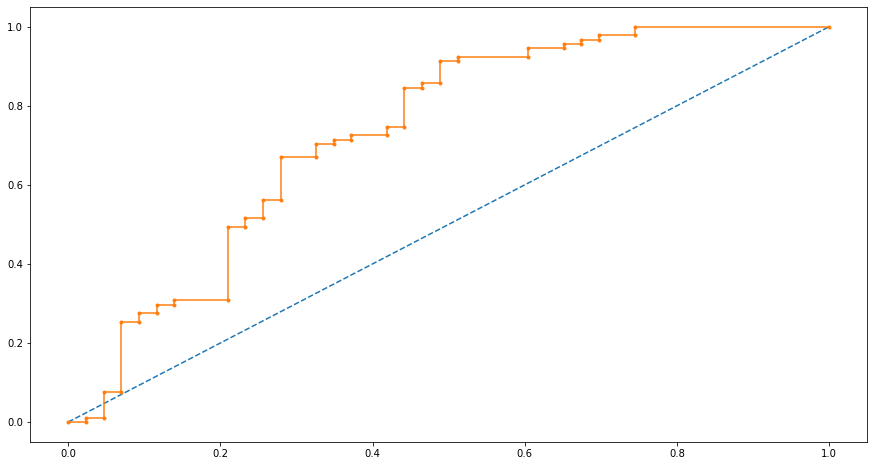

Model 2 AUC: 0.59392


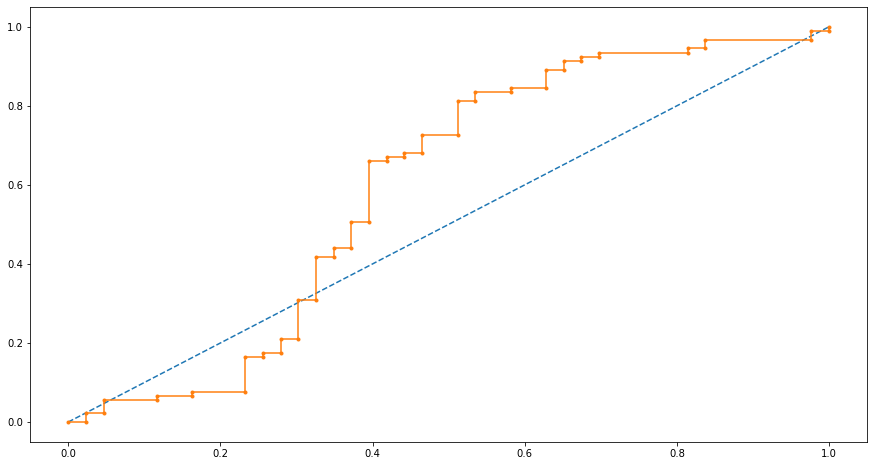

In [1164]:
# AUC and ROC for the model 1


auc = metrics.roc_auc_score(Test['Transport'],model_1_test_probabilities[:, 1])
print('Model 1 AUC: %.5f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(Test['Transport'],model_1_test_probabilities[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


# AUC and ROC for the model 2

auc = metrics.roc_auc_score(Test['Transport'],model_2_Test_probabilities[:, 1])
print('Model 2 AUC: %.5f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(Test['Transport'],model_2_Test_probabilities[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


# 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective.

After doing EDA on dataframe it shows that:

 .There are total of 9 variables: float64(2) int64(5) object(2).
 
 .shape of the data frame is Number of rows: 444 & Number of columns: 9.
 
 .There was no null values & there are no duplicated values in data frame.
 
 .We also did descriptive statistics to know the data.
 
 .To visualize the data we did Univariate Analysis & Bivariate Analysis.
 
 .We remove the outliers from the data.
 
we Convert all objects to categorical codes & splits the data into 70(Training) & 30 (Testing) data.

we did scaling to creat a model to compare with original data frame.

Through Logistic Regression we compare both model to find accurate score.

And did KNN( to solve both classification and regression problems.) model on both models.

Did Bagging to reduce variance within a training model.

Did Boosting to reduce errors in predictive data analysis.

Did Model Tuning to provides optimized values for hyperparameters, which maximize your model's predictive accuracy.

And Performance Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model.
